## **Decision Trees and Random Forests**


1.   Train a Decision Tree Classifier and visualize the tree
2.   Analyze overfitting and control tree depth
3.   Train a Random Forest and compare accuracy.
4.   Interpret feature importances.
5.   Evaluate using cross-validation.



In [ ]:
import pandas as pd

In [3]:
df = pd.read_csv("/content/heart.csv")

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


Data Preparation

Separate the features and the target variable.

Split the data into training and testing sets.

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X = df.drop(columns=['target'])
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Decision Tree Classifier

Train a Decision Tree Classifier and visualize the tree.

In [9]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score
import graphviz

In [10]:
dt_model = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [11]:
y_pred_dt = dt_model.predict(X_test)

In [13]:
accuracy_train_dt = accuracy_score(y_train, dt_model.predict(X_train))
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree - Training Accuracy: {accuracy_train_dt:.2f}")
print(f"Decision Tree - Testing Accuracy: {accuracy_dt:.2f}")

Decision Tree - Training Accuracy: 0.86
Decision Tree - Testing Accuracy: 0.81


In [14]:
dot_data = export_graphviz(dt_model, out_file=None,
                           feature_names=X.columns,
                           class_names=['No Disease', 'Disease'],
                           filled=True, rounded=True,
                           special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("decision_tree")

'decision_tree.pdf'

Analyze overfitting and control tree depth

In [17]:
import matplotlib.pyplot as plt

In [15]:
depths = range(1, 11)
train_accuracies = []
test_accuracies = []

for depth in depths:
    dt_model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt_model.fit(X_train, y_train)

    train_acc = accuracy_score(y_train, dt_model.predict(X_train))
    test_acc = accuracy_score(y_test, dt_model.predict(X_test))

    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

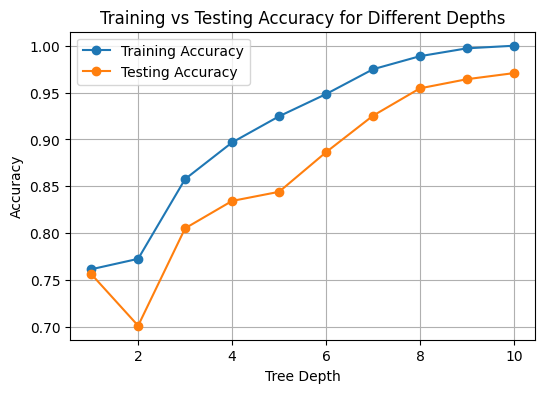

In [19]:
plt.figure(figsize=(6, 4))
plt.plot(depths, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(depths, test_accuracies, label='Testing Accuracy', marker='o')
plt.title('Training vs Testing Accuracy for Different Depths')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

Train a Random Forest and compare accuracy

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [22]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [24]:
y_pred_rf = rf_model.predict(X_test)

accuracy_train_rf = accuracy_score(y_train, rf_model.predict(X_train))
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest - Training Accuracy: {accuracy_train_rf:.2f}")
print(f"Random Forest - Testing Accuracy: {accuracy_rf:.2f}")

Random Forest - Training Accuracy: 1.00
Random Forest - Testing Accuracy: 0.98


Interpret feature importances

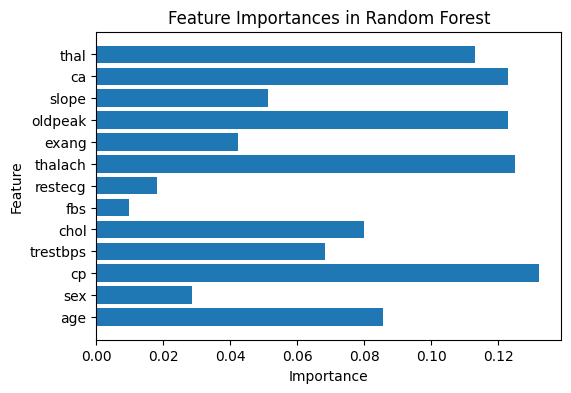

In [26]:
importances = rf_model.feature_importances_

plt.figure(figsize=(6, 4))
plt.barh(X.columns, importances)
plt.title('Feature Importances in Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

Cross-validation.

In [28]:
from sklearn.model_selection import cross_val_score

In [29]:
cv_scores = cross_val_score(rf_model, X, y, cv=5)
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Cross-Validation Score: {cv_scores.mean():.2f}")


Cross-Validation Scores: [1.         1.         1.         1.         0.98536585]
Mean Cross-Validation Score: 1.00
